## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №4. Градиентный бустинг ~~своими руками~~

Задание выполнил(а): свои фамилию и имя

### Общая информация
__Дата выдачи:__ 27.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_04_Фамилия_Имя.ipynb

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data). 
* Загрузите таблицу application_train.csv;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score,precision_score, auc,precision_recall_curve, recall_score, roc_auc_score, roc_curve, f1_score,average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.model_selection import KFold

In [17]:
data=pd.DataFrame(pd.read_csv('application_train[1].csv'))
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y=data['TARGET']

In [19]:
data.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [330]:
df=data.drop(columns=['SK_ID_CURR','NAME_TYPE_SUITE','NAME_INCOME_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_DOCUMENT_21','FLAG_DOCUMENT_20','FLAG_DOCUMENT_19','FLAG_DOCUMENT_18','FLAG_DOCUMENT_17','FLAG_DOCUMENT_16','FLAG_DOCUMENT_15','FLAG_DOCUMENT_14','FLAG_DOCUMENT_13','FLAG_DOCUMENT_12','FLAG_DOCUMENT_11','FLAG_DOCUMENT_10','FLAG_DOCUMENT_9','EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE'])

In [21]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df.dtypes.value_counts()

float64    65
int64      26
object      7
dtype: int64

In [98]:
cat_col=[]
for i in df.select_dtypes(include=[object]).columns:
    cat_col.append(i)
for i in df:
    if i in df_drop_cat.filter(regex=r'^FLAG.', axis=1).columns:
        cat_col.append(i)
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8']

In [99]:
df_drop_cat=df.drop(columns=cat_col)

In [100]:
df_drop_cat.dtypes.value_counts()

float64    65
int64      13
dtype: int64

In [165]:
df_drop_cat=df_drop_cat.copy()
for i in df_drop_cat:
    df_drop_cat[i].fillna(df_drop_cat[i].value_counts().median(),inplace=True)

In [166]:
X=df_drop_cat.drop(columns=['TARGET'])
y=df_drop_cat['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [103]:
data.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

__Задание 2. (1.5 балла)__

Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [30]:
import lightgbm as lgbm
from catboost import CatBoostClassifier

In [105]:
lgbt=lgbm.LGBMClassifier()

In [106]:
%%time
lgbt.fit(X_train,y_train)

Wall time: 17.9 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

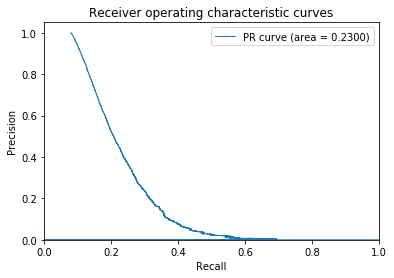

0.2300332415152631


In [107]:
def generate_metrics(prediction):
    fpr = dict()
    tpr = dict()
    pr_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = precision_recall_curve(y_test, prediction[:, i])
        pr_auc[i] = auc(tpr[i],fpr[i])
    return fpr, tpr, pr_auc

lr_pred1 = lgbt.predict_proba(X_test)
lr1_fpr, lr1_tpr, lr1_roc_auc = generate_metrics(lr_pred1)
plt.plot(lr1_fpr[1], lr1_tpr[1], lw=1, label='PR curve (area = %0.4f)' % lr1_roc_auc[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Receiver operating characteristic curves')
plt.legend(loc='best')
plt.show()
print(lr1_roc_auc[1])

In [157]:
cat_clf=CatBoostClassifier()

In [155]:
cat_clf.fit(X_train,y_train)

Learning rate set to 0.076622


0:	learn: 0.6154362	total: 465ms	remaining: 7m 44s
1:	learn: 0.5535844	total: 866ms	remaining: 7m 12s
2:	learn: 0.5036800	total: 1.39s	remaining: 7m 42s
3:	learn: 0.4593712	total: 1.81s	remaining: 7m 31s
4:	learn: 0.4252008	total: 2.27s	remaining: 7m 30s
5:	learn: 0.3972044	total: 2.65s	remaining: 7m 18s
6:	learn: 0.3735180	total: 3.03s	remaining: 7m 9s
7:	learn: 0.3533706	total: 3.4s	remaining: 7m 2s
8:	learn: 0.3368231	total: 3.8s	remaining: 6m 58s
9:	learn: 0.3241771	total: 4.17s	remaining: 6m 53s
10:	learn: 0.3133206	total: 4.52s	remaining: 6m 46s
11:	learn: 0.3045209	total: 4.92s	remaining: 6m 44s
12:	learn: 0.2972966	total: 5.29s	remaining: 6m 41s
13:	learn: 0.2909546	total: 5.67s	remaining: 6m 39s
14:	learn: 0.2857282	total: 6.05s	remaining: 6m 37s
15:	learn: 0.2821124	total: 6.44s	remaining: 6m 35s
16:	learn: 0.2788182	total: 6.79s	remaining: 6m 32s
17:	learn: 0.2754326	total: 7.19s	remaining: 6m 32s
18:	learn: 0.2730001	total: 7.58s	remaining: 6m 31s
19:	learn: 0.2703528	total

158:	learn: 0.2469700	total: 1m 3s	remaining: 5m 35s
159:	learn: 0.2469350	total: 1m 3s	remaining: 5m 34s
160:	learn: 0.2469043	total: 1m 4s	remaining: 5m 34s
161:	learn: 0.2468712	total: 1m 4s	remaining: 5m 34s
162:	learn: 0.2468502	total: 1m 4s	remaining: 5m 33s
163:	learn: 0.2467996	total: 1m 5s	remaining: 5m 33s
164:	learn: 0.2467663	total: 1m 5s	remaining: 5m 32s
165:	learn: 0.2467272	total: 1m 6s	remaining: 5m 32s
166:	learn: 0.2466982	total: 1m 6s	remaining: 5m 31s
167:	learn: 0.2466633	total: 1m 6s	remaining: 5m 31s
168:	learn: 0.2466309	total: 1m 7s	remaining: 5m 30s
169:	learn: 0.2465834	total: 1m 7s	remaining: 5m 30s
170:	learn: 0.2465563	total: 1m 7s	remaining: 5m 29s
171:	learn: 0.2465206	total: 1m 8s	remaining: 5m 29s
172:	learn: 0.2464690	total: 1m 8s	remaining: 5m 28s
173:	learn: 0.2464367	total: 1m 9s	remaining: 5m 28s
174:	learn: 0.2464108	total: 1m 9s	remaining: 5m 27s
175:	learn: 0.2463472	total: 1m 9s	remaining: 5m 27s
176:	learn: 0.2463067	total: 1m 10s	remaining:

311:	learn: 0.2425694	total: 2m 4s	remaining: 4m 34s
312:	learn: 0.2425518	total: 2m 4s	remaining: 4m 34s
313:	learn: 0.2425269	total: 2m 5s	remaining: 4m 33s
314:	learn: 0.2424942	total: 2m 5s	remaining: 4m 33s
315:	learn: 0.2424842	total: 2m 6s	remaining: 4m 33s
316:	learn: 0.2424526	total: 2m 6s	remaining: 4m 32s
317:	learn: 0.2424285	total: 2m 6s	remaining: 4m 32s
318:	learn: 0.2424083	total: 2m 7s	remaining: 4m 31s
319:	learn: 0.2423856	total: 2m 7s	remaining: 4m 31s
320:	learn: 0.2423638	total: 2m 8s	remaining: 4m 31s
321:	learn: 0.2423417	total: 2m 8s	remaining: 4m 30s
322:	learn: 0.2423151	total: 2m 8s	remaining: 4m 30s
323:	learn: 0.2423012	total: 2m 9s	remaining: 4m 29s
324:	learn: 0.2422678	total: 2m 9s	remaining: 4m 29s
325:	learn: 0.2422374	total: 2m 10s	remaining: 4m 29s
326:	learn: 0.2422133	total: 2m 10s	remaining: 4m 29s
327:	learn: 0.2421862	total: 2m 11s	remaining: 4m 28s
328:	learn: 0.2421723	total: 2m 11s	remaining: 4m 28s
329:	learn: 0.2421529	total: 2m 11s	remain

464:	learn: 0.2391565	total: 3m 2s	remaining: 3m 29s
465:	learn: 0.2391268	total: 3m 2s	remaining: 3m 29s
466:	learn: 0.2391109	total: 3m 2s	remaining: 3m 28s
467:	learn: 0.2390768	total: 3m 3s	remaining: 3m 28s
468:	learn: 0.2390501	total: 3m 3s	remaining: 3m 27s
469:	learn: 0.2390291	total: 3m 3s	remaining: 3m 27s
470:	learn: 0.2390140	total: 3m 4s	remaining: 3m 26s
471:	learn: 0.2389872	total: 3m 4s	remaining: 3m 26s
472:	learn: 0.2389666	total: 3m 4s	remaining: 3m 26s
473:	learn: 0.2389430	total: 3m 5s	remaining: 3m 25s
474:	learn: 0.2389211	total: 3m 5s	remaining: 3m 25s
475:	learn: 0.2388991	total: 3m 6s	remaining: 3m 24s
476:	learn: 0.2388635	total: 3m 6s	remaining: 3m 24s
477:	learn: 0.2388368	total: 3m 6s	remaining: 3m 24s
478:	learn: 0.2388076	total: 3m 7s	remaining: 3m 23s
479:	learn: 0.2387891	total: 3m 7s	remaining: 3m 23s
480:	learn: 0.2387699	total: 3m 8s	remaining: 3m 22s
481:	learn: 0.2387567	total: 3m 8s	remaining: 3m 22s
482:	learn: 0.2387396	total: 3m 8s	remaining: 

617:	learn: 0.2359115	total: 3m 58s	remaining: 2m 27s
618:	learn: 0.2358974	total: 3m 58s	remaining: 2m 26s
619:	learn: 0.2358848	total: 3m 59s	remaining: 2m 26s
620:	learn: 0.2358797	total: 3m 59s	remaining: 2m 26s
621:	learn: 0.2358639	total: 3m 59s	remaining: 2m 25s
622:	learn: 0.2358446	total: 4m	remaining: 2m 25s
623:	learn: 0.2358185	total: 4m	remaining: 2m 24s
624:	learn: 0.2358035	total: 4m	remaining: 2m 24s
625:	learn: 0.2357741	total: 4m 1s	remaining: 2m 24s
626:	learn: 0.2357537	total: 4m 1s	remaining: 2m 23s
627:	learn: 0.2357323	total: 4m 2s	remaining: 2m 23s
628:	learn: 0.2357011	total: 4m 2s	remaining: 2m 22s
629:	learn: 0.2356861	total: 4m 2s	remaining: 2m 22s
630:	learn: 0.2356711	total: 4m 3s	remaining: 2m 22s
631:	learn: 0.2356565	total: 4m 3s	remaining: 2m 21s
632:	learn: 0.2356342	total: 4m 3s	remaining: 2m 21s
633:	learn: 0.2356191	total: 4m 4s	remaining: 2m 20s
634:	learn: 0.2356028	total: 4m 4s	remaining: 2m 20s
635:	learn: 0.2355763	total: 4m 4s	remaining: 2m 2

771:	learn: 0.2329143	total: 4m 58s	remaining: 1m 28s
772:	learn: 0.2328930	total: 4m 58s	remaining: 1m 27s
773:	learn: 0.2328719	total: 4m 59s	remaining: 1m 27s
774:	learn: 0.2328589	total: 4m 59s	remaining: 1m 26s
775:	learn: 0.2328383	total: 4m 59s	remaining: 1m 26s
776:	learn: 0.2328231	total: 5m	remaining: 1m 26s
777:	learn: 0.2328072	total: 5m	remaining: 1m 25s
778:	learn: 0.2327871	total: 5m 1s	remaining: 1m 25s
779:	learn: 0.2327702	total: 5m 1s	remaining: 1m 25s
780:	learn: 0.2327523	total: 5m 1s	remaining: 1m 24s
781:	learn: 0.2327354	total: 5m 2s	remaining: 1m 24s
782:	learn: 0.2327247	total: 5m 2s	remaining: 1m 23s
783:	learn: 0.2327095	total: 5m 2s	remaining: 1m 23s
784:	learn: 0.2326754	total: 5m 3s	remaining: 1m 23s
785:	learn: 0.2326440	total: 5m 3s	remaining: 1m 22s
786:	learn: 0.2326213	total: 5m 4s	remaining: 1m 22s
787:	learn: 0.2326005	total: 5m 4s	remaining: 1m 21s
788:	learn: 0.2325913	total: 5m 4s	remaining: 1m 21s
789:	learn: 0.2325676	total: 5m 5s	remaining: 1

926:	learn: 0.2299394	total: 5m 59s	remaining: 28.3s
927:	learn: 0.2299133	total: 5m 59s	remaining: 27.9s
928:	learn: 0.2298951	total: 5m 59s	remaining: 27.5s
929:	learn: 0.2298869	total: 6m	remaining: 27.1s
930:	learn: 0.2298684	total: 6m	remaining: 26.7s
931:	learn: 0.2298450	total: 6m 1s	remaining: 26.3s
932:	learn: 0.2298259	total: 6m 1s	remaining: 26s
933:	learn: 0.2298016	total: 6m 1s	remaining: 25.6s
934:	learn: 0.2297822	total: 6m 2s	remaining: 25.2s
935:	learn: 0.2297637	total: 6m 2s	remaining: 24.8s
936:	learn: 0.2297548	total: 6m 2s	remaining: 24.4s
937:	learn: 0.2297348	total: 6m 3s	remaining: 24s
938:	learn: 0.2297241	total: 6m 3s	remaining: 23.6s
939:	learn: 0.2297116	total: 6m 3s	remaining: 23.2s
940:	learn: 0.2296920	total: 6m 4s	remaining: 22.8s
941:	learn: 0.2296796	total: 6m 4s	remaining: 22.5s
942:	learn: 0.2296663	total: 6m 5s	remaining: 22.1s
943:	learn: 0.2296468	total: 6m 5s	remaining: 21.7s
944:	learn: 0.2296285	total: 6m 5s	remaining: 21.3s
945:	learn: 0.22961

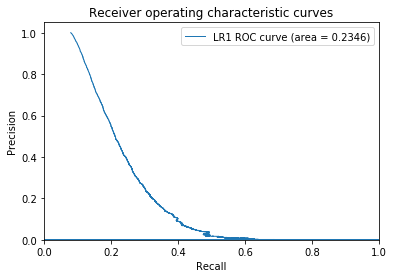

0.23457306474682665


In [156]:
lr_pred1 = cat_clf.predict_proba(X_test)
lr1_fpr, lr1_tpr, lr1_roc_auc = generate_metrics(lr_pred1)
plt.plot(lr1_fpr[1], lr1_tpr[1], lw=1, label='PR curve (area = %0.4f)' % lr1_roc_auc[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Receiver operating characteristic curves')
plt.legend(loc='best')
plt.show()
print(lr1_roc_auc[1])

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [34]:
from sklearn.grid_search import GridSearchCV

D:\q1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\q1\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


потестируем, как зависит average_precision_score от некоторых значениях параметров LGBM 

In [120]:
%%time
res=[]
for i in np.linspace(50,1250,25):
    i=int(i)    
    lgbt_test=lgbm.LGBMClassifier(n_estimators=i)
    lgbt_test.fit(X_train,y_train)
    a=average_precision_score(y_test,lgbt_test.predict_proba(X_test)[:,1])
    res.append(a)
print(res)

[0.22863046108796198, 0.23018169716873838, 0.2289126431644783, 0.227417633710323, 0.22665919804088547, 0.2264641822604282, 0.22536395720336438, 0.2250194315588389, 0.22420752073344688, 0.22308200696152386, 0.22289319188773932, 0.22255968293828174, 0.22189354575187104, 0.22101984832639748, 0.2203958724264716, 0.2199825958235431, 0.21973138579226487, 0.21936587164222965, 0.21933540750251615, 0.218861773776515, 0.21883920712329816, 0.21821019153676935, 0.2179980753193467, 0.21793280775654503, 0.2176829686093657]


In [133]:
%%time
res1=[]
for i in range(-1,10,1):   
    lgbt_test=lgbm.LGBMClassifier(max_depth=i)
    lgbt_test.fit(X_train,y_train)
    a=average_precision_score(y_test,lgbt_test.predict_proba(X_test)[:,1])
    res1.append(a)
print(res1)

[0.23018169716873838, 0.23018169716873838, 0.2011263609977048, 0.2186985751611675, 0.22324215314932716, 0.227597679323599, 0.23047859909399984, 0.2310248146141468, 0.23128653233536167, 0.22988146634723927, 0.23024552633850343]


In [140]:
%%time
res_lins=[]
for i in np.arange(0.05,0.5,0.05):
    lgbt_test=lgbm.LGBMClassifier(learning_rate=i)
    lgbt_test.fit(X_train,y_train)
    a=average_precision_score(y_test,lgbt_test.predict_proba(X_test)[:,1])
    res_lins.append(a)
print(res_lins)    

[0.2299391772245827, 0.23018169716873838, 0.22813953408749094, 0.2194419759293253, 0.21530456804179066, 0.20479532030658507, 0.19826859369432176, 0.18823275690970706, 0.18129751834317887]
Wall time: 2min 23s


цикл, чтобы посчитать оптимальный параметр 

считает долго (очень) 

для бустинга

In [203]:
%%time
itog_gb={}

for i in np.arange(0.05,0.15,0.01):
    for j in np.linspace(50,250,5):
        for k in range(-1,9,1):
            err_avg=[]
            kf=KFold(n_splits=3)
            par=[]
            par.append([i,j,k])
            lgbt_cv=lgbm.LGBMClassifier(learning_rate=i,max_depth=int(k),n_estimators=int(j))
            for train_index, test_index in kf.split(X_train):
                X_trai, X_tes = X_train.iloc[train_index], X_train.iloc[test_index]
                y_trai, y_tes = y_train.iloc[train_index], y_train.iloc[test_index]
                lgbt_cv.fit(X_trai,y_trai)
            err=average_precision_score(y_tes,lgbt_cv.predict_proba(X_tes)[:,1])
            err_avg.append(err)
        itog_gb[np.mean(err_avg)]=par 
itog_gb=sorted(itog_gb.items(), key=lambda t: t[0],reverse=True)
itog_gb[0]

KeyboardInterrupt: 

Для кэтбустинга

In [205]:
%%time
itog_cb={}
for ff in ['Logloss', 'AUC']:
    for i in np.arange(0.1,0.5,0.1):
        for j in np.linspace(50,100,1):
            for k in range(1,9,1):
                err_avg=[]
                kf=KFold(n_splits=3)
                par=[]
                par.append([i,j,k])
                cat_calf=CatBoostClassifier(loss_function=ff,eta=i,max_depth=int(k),n_estimators=int(j))
                for train_index, test_index in kf.split(X_train):
                    X_trai, X_tes = X_train.iloc[train_index], X_train.iloc[test_index]
                    y_trai, y_tes = y_train.iloc[train_index], y_train.iloc[test_index]
                    cat_calf.fit(X_trai,y_trai)
                err=average_precision_score(y_tes,cat_calf.predict_proba(X_tes)[:,1])
                err_avg.append(err)
            itog_cb[np.mean(err_avg)]=par 
itog_cb=sorted(itog_cb.items(), key=lambda t: t[0],reverse=True)
itog_cb[0]

0:	learn: 0.5985293	total: 352ms	remaining: 17.2s
1:	learn: 0.5259764	total: 493ms	remaining: 11.8s
2:	learn: 0.4703612	total: 636ms	remaining: 9.96s
3:	learn: 0.4248303	total: 790ms	remaining: 9.09s
4:	learn: 0.3899639	total: 933ms	remaining: 8.39s
5:	learn: 0.3638748	total: 1.06s	remaining: 7.78s
6:	learn: 0.3432506	total: 1.2s	remaining: 7.36s
7:	learn: 0.3279620	total: 1.35s	remaining: 7.07s
8:	learn: 0.3156961	total: 1.49s	remaining: 6.8s
9:	learn: 0.3057017	total: 1.63s	remaining: 6.52s
10:	learn: 0.2979154	total: 1.78s	remaining: 6.31s
11:	learn: 0.2916595	total: 1.9s	remaining: 6.03s
12:	learn: 0.2866989	total: 2.05s	remaining: 5.83s
13:	learn: 0.2828802	total: 2.17s	remaining: 5.59s
14:	learn: 0.2799448	total: 2.32s	remaining: 5.41s
15:	learn: 0.2774431	total: 2.46s	remaining: 5.22s
16:	learn: 0.2753460	total: 2.6s	remaining: 5.04s
17:	learn: 0.2738174	total: 2.71s	remaining: 4.83s
18:	learn: 0.2723094	total: 2.86s	remaining: 4.67s
19:	learn: 0.2712990	total: 2.99s	remaining: 

KeyboardInterrupt: 

получим,что для catboost лучшие параметры: loss_function='Logloss',n_estimators=450,eta=0.09,max_depth=8
для lgbm: max_depth=-1, n_estimators=100,learning_rate=0.09,objective='binary'

циклы выше случайно запустил заново пришлось интеррапнуть

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

через OHE

In [331]:
df_cat_ohe=pd.get_dummies(df,prefix_sep="__",columns=cat_col)

In [335]:
df_cat_ohe=df_cat_ohe.copy()
for i in df_cat_ohe:
    df_cat_ohe[i].fillna(df_cat_ohe[i].value_counts().median(),inplace=True)

In [328]:
df_cat_ohe.columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_4__25', 'FLAG_DOCUMENT_4__307486',
       'FLAG_DOCUMENT_5__4648', 'FLAG_DOCUMENT_5__302863',
       'FLAG_DOCUMENT_6__27078', 'FLAG_DOCUMENT_6__280433',
       'FLAG_DOCUMENT_7__59', 'FLAG_DOCUMENT_7__307452',
       'FLAG_DOCUMENT_8__25024', 'FLAG_DOCUMENT_8__282487'],
      dtype='object', length=130)

через счетчики

In [279]:
df_s=df

In [280]:
for x in cat_col:
    df_s[x]=df[x].map(df[x].value_counts().to_dict())

In [283]:
df_s=df_s.copy()
for i in df_s:
    df_s[i].fillna(df_s[i].value_counts().median(),inplace=True)

проведем LabelEncoding для исходной таблицы, чтобы сравнить с ОНЕ и счетчиками 

In [ ]:
df_label=df
for i in cat_col:
    v=k=0
    v, k = pd.factorize(sorted(df_label[i].unique()))
    m = dict(zip(k.tolist(), (v+1).tolist()))
    df_label[i]=df_label[i].replace(m)

создадим три выборки
(использую лучшие параметры, подобранные в предыдущем пункте)

In [360]:
X_train_lable, X_test_lable, y_train_lable, y_test_lable = train_test_split(df_label.drop(columns='TARGET'), df_label['TARGET'],test_size=0.3, random_state=0)

In [591]:
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(df_cat_ohe.drop(columns='TARGET'), df_cat_ohe['TARGET'],test_size=0.3, random_state=0)

In [592]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(df_s.drop(columns='TARGET'), df_s['TARGET'],test_size=0.3, random_state=0)

обучим градиентный бустинг

In [403]:
%%time
lgbt_4_new_lable=lgbm.LGBMClassifier(max_depth=-1, n_estimators=100,learning_rate=0.09)
lgbt_4_new_lable.fit(X_train_lable,y_train_lable)
print(average_precision_score(y_test_lable,lgbt_4_new_lable.predict_proba(X_test_lable)[:,1]))

0.2348703846435931
Wall time: 26.3 s


In [404]:
%%time
lgbt_4_new_ohe=lgbm.LGBMClassifier(max_depth=-1, n_estimators=100,learning_rate=0.09)
lgbt_4_new_ohe.fit(X_train_ohe,y_train_ohe)
print(average_precision_score(y_test_ohe,lgbt_4_new_ohe.predict_proba(X_test_ohe)[:,1]))

0.23703938388303475
Wall time: 25.1 s


In [405]:
%%time
lgbt_4_new_s=lgbm.LGBMClassifier(max_depth=-1, n_estimators=100,learning_rate=0.09)
lgbt_4_new_s.fit(X_train_s,y_train_s)
print(average_precision_score(y_test_s,lgbt_4_new_s.predict_proba(X_test_s)[:,1]))

0.23827215072973162
Wall time: 24.8 s


обучим кошкабуст

In [394]:
%%time
cat_4_new_lable=CatBoostClassifier(loss_function='Logloss',n_estimators=450,learning_rate=0.09,max_depth=8 )
cat_4_new_lable.fit(X_train_lable,y_train_lable)
print(average_precision_score(y_test_lable,cat_4_new_lable.predict_proba(X_test_lable)[:,1]))

0:	learn: 0.5981181	total: 632ms	remaining: 4m 43s
1:	learn: 0.5279091	total: 1.25s	remaining: 4m 41s
2:	learn: 0.4752911	total: 1.79s	remaining: 4m 26s
3:	learn: 0.4339751	total: 2.29s	remaining: 4m 15s
4:	learn: 0.3986371	total: 2.85s	remaining: 4m 13s
5:	learn: 0.3713765	total: 3.35s	remaining: 4m 8s
6:	learn: 0.3480227	total: 3.88s	remaining: 4m 5s
7:	learn: 0.3312207	total: 4.32s	remaining: 3m 58s
8:	learn: 0.3179398	total: 4.85s	remaining: 3m 57s
9:	learn: 0.3057768	total: 5.43s	remaining: 3m 58s
10:	learn: 0.2972418	total: 6.06s	remaining: 4m 2s
11:	learn: 0.2903201	total: 6.67s	remaining: 4m 3s
12:	learn: 0.2840747	total: 7.25s	remaining: 4m 3s
13:	learn: 0.2790143	total: 7.85s	remaining: 4m 4s
14:	learn: 0.2754541	total: 8.43s	remaining: 4m 4s
15:	learn: 0.2719065	total: 9.1s	remaining: 4m 6s
16:	learn: 0.2690428	total: 9.69s	remaining: 4m 6s
17:	learn: 0.2662926	total: 10.3s	remaining: 4m 6s
18:	learn: 0.2644226	total: 10.9s	remaining: 4m 7s
19:	learn: 0.2623974	total: 11.5s	

158:	learn: 0.2384125	total: 1m 23s	remaining: 2m 33s
159:	learn: 0.2383479	total: 1m 24s	remaining: 2m 32s
160:	learn: 0.2382912	total: 1m 24s	remaining: 2m 31s
161:	learn: 0.2381937	total: 1m 25s	remaining: 2m 31s
162:	learn: 0.2381211	total: 1m 25s	remaining: 2m 30s
163:	learn: 0.2380806	total: 1m 26s	remaining: 2m 30s
164:	learn: 0.2380298	total: 1m 26s	remaining: 2m 29s
165:	learn: 0.2379677	total: 1m 27s	remaining: 2m 29s
166:	learn: 0.2378701	total: 1m 27s	remaining: 2m 28s
167:	learn: 0.2378138	total: 1m 28s	remaining: 2m 27s
168:	learn: 0.2377442	total: 1m 28s	remaining: 2m 27s
169:	learn: 0.2377044	total: 1m 29s	remaining: 2m 27s
170:	learn: 0.2376254	total: 1m 29s	remaining: 2m 26s
171:	learn: 0.2375105	total: 1m 30s	remaining: 2m 26s
172:	learn: 0.2373829	total: 1m 31s	remaining: 2m 26s
173:	learn: 0.2373173	total: 1m 31s	remaining: 2m 25s
174:	learn: 0.2372428	total: 1m 32s	remaining: 2m 25s
175:	learn: 0.2371855	total: 1m 33s	remaining: 2m 24s
176:	learn: 0.2370661	total:

311:	learn: 0.2284226	total: 2m 49s	remaining: 1m 14s
312:	learn: 0.2283173	total: 2m 50s	remaining: 1m 14s
313:	learn: 0.2282260	total: 2m 50s	remaining: 1m 13s
314:	learn: 0.2281078	total: 2m 51s	remaining: 1m 13s
315:	learn: 0.2280640	total: 2m 52s	remaining: 1m 12s
316:	learn: 0.2279932	total: 2m 52s	remaining: 1m 12s
317:	learn: 0.2279189	total: 2m 53s	remaining: 1m 11s
318:	learn: 0.2278887	total: 2m 53s	remaining: 1m 11s
319:	learn: 0.2278133	total: 2m 54s	remaining: 1m 10s
320:	learn: 0.2277389	total: 2m 54s	remaining: 1m 10s
321:	learn: 0.2276874	total: 2m 55s	remaining: 1m 9s
322:	learn: 0.2276273	total: 2m 55s	remaining: 1m 9s
323:	learn: 0.2275936	total: 2m 56s	remaining: 1m 8s
324:	learn: 0.2275035	total: 2m 56s	remaining: 1m 8s
325:	learn: 0.2273924	total: 2m 57s	remaining: 1m 7s
326:	learn: 0.2273229	total: 2m 58s	remaining: 1m 7s
327:	learn: 0.2272528	total: 2m 58s	remaining: 1m 6s
328:	learn: 0.2272024	total: 2m 59s	remaining: 1m 5s
329:	learn: 0.2271630	total: 2m 59s	

In [401]:
%%time
cat_4_new_ohe=CatBoostClassifier(loss_function='Logloss',n_estimators=450,learning_rate=0.09,max_depth=8 )
cat_4_new_ohe.fit(X_train_ohe,y_train_ohe)
print(average_precision_score(y_test_ohe,cat_4_new_ohe.predict_proba(X_test_ohe)[:,1]))

0:	learn: 0.6022963	total: 600ms	remaining: 4m 29s
1:	learn: 0.5323492	total: 874ms	remaining: 3m 15s
2:	learn: 0.4747381	total: 1.39s	remaining: 3m 26s
3:	learn: 0.4309016	total: 1.91s	remaining: 3m 33s
4:	learn: 0.3969229	total: 2.43s	remaining: 3m 36s
5:	learn: 0.3685568	total: 3.01s	remaining: 3m 42s
6:	learn: 0.3477535	total: 3.63s	remaining: 3m 49s
7:	learn: 0.3299698	total: 4.28s	remaining: 3m 56s
8:	learn: 0.3160539	total: 4.84s	remaining: 3m 57s
9:	learn: 0.3057904	total: 5.41s	remaining: 3m 58s
10:	learn: 0.2962487	total: 5.92s	remaining: 3m 56s
11:	learn: 0.2887862	total: 6.43s	remaining: 3m 54s
12:	learn: 0.2831738	total: 6.91s	remaining: 3m 52s
13:	learn: 0.2782718	total: 7.4s	remaining: 3m 50s
14:	learn: 0.2745545	total: 7.95s	remaining: 3m 50s
15:	learn: 0.2710224	total: 8.55s	remaining: 3m 52s
16:	learn: 0.2684086	total: 9.08s	remaining: 3m 51s
17:	learn: 0.2658459	total: 9.61s	remaining: 3m 50s
18:	learn: 0.2635816	total: 10.2s	remaining: 3m 50s
19:	learn: 0.2616730	to

158:	learn: 0.2368727	total: 1m 29s	remaining: 2m 43s
159:	learn: 0.2368069	total: 1m 29s	remaining: 2m 42s
160:	learn: 0.2367194	total: 1m 30s	remaining: 2m 41s
161:	learn: 0.2366081	total: 1m 30s	remaining: 2m 41s
162:	learn: 0.2365392	total: 1m 31s	remaining: 2m 40s
163:	learn: 0.2364574	total: 1m 31s	remaining: 2m 39s
164:	learn: 0.2363806	total: 1m 32s	remaining: 2m 39s
165:	learn: 0.2362919	total: 1m 32s	remaining: 2m 38s
166:	learn: 0.2361851	total: 1m 33s	remaining: 2m 38s
167:	learn: 0.2361302	total: 1m 33s	remaining: 2m 37s
168:	learn: 0.2360545	total: 1m 34s	remaining: 2m 36s
169:	learn: 0.2359617	total: 1m 34s	remaining: 2m 36s
170:	learn: 0.2358612	total: 1m 35s	remaining: 2m 35s
171:	learn: 0.2357790	total: 1m 35s	remaining: 2m 34s
172:	learn: 0.2356829	total: 1m 36s	remaining: 2m 34s
173:	learn: 0.2356099	total: 1m 36s	remaining: 2m 33s
174:	learn: 0.2355504	total: 1m 37s	remaining: 2m 33s
175:	learn: 0.2354584	total: 1m 37s	remaining: 2m 32s
176:	learn: 0.2353968	total:

311:	learn: 0.2262696	total: 2m 47s	remaining: 1m 13s
312:	learn: 0.2262251	total: 2m 47s	remaining: 1m 13s
313:	learn: 0.2261693	total: 2m 48s	remaining: 1m 12s
314:	learn: 0.2260854	total: 2m 48s	remaining: 1m 12s
315:	learn: 0.2260252	total: 2m 49s	remaining: 1m 11s
316:	learn: 0.2259632	total: 2m 49s	remaining: 1m 11s
317:	learn: 0.2258642	total: 2m 50s	remaining: 1m 10s
318:	learn: 0.2258093	total: 2m 50s	remaining: 1m 10s
319:	learn: 0.2257801	total: 2m 51s	remaining: 1m 9s
320:	learn: 0.2256834	total: 2m 51s	remaining: 1m 9s
321:	learn: 0.2256590	total: 2m 52s	remaining: 1m 8s
322:	learn: 0.2255763	total: 2m 52s	remaining: 1m 7s
323:	learn: 0.2255120	total: 2m 53s	remaining: 1m 7s
324:	learn: 0.2254762	total: 2m 53s	remaining: 1m 6s
325:	learn: 0.2254521	total: 2m 54s	remaining: 1m 6s
326:	learn: 0.2253946	total: 2m 54s	remaining: 1m 5s
327:	learn: 0.2253265	total: 2m 55s	remaining: 1m 5s
328:	learn: 0.2252693	total: 2m 55s	remaining: 1m 4s
329:	learn: 0.2252050	total: 2m 56s	re

In [402]:
%%time
cat_4_new_s=CatBoostClassifier(loss_function='Logloss',n_estimators=450,learning_rate=0.09,max_depth=8)
cat_4_new_s.fit(X_train_s,y_train_s)
print(average_precision_score(y_test_s,cat_4_new_s.predict_proba(X_test_s)[:,1]))

0:	learn: 0.5994189	total: 519ms	remaining: 3m 52s
1:	learn: 0.5263008	total: 1.05s	remaining: 3m 56s
2:	learn: 0.4739142	total: 1.57s	remaining: 3m 54s
3:	learn: 0.4321912	total: 2.06s	remaining: 3m 49s
4:	learn: 0.3973079	total: 2.61s	remaining: 3m 51s
5:	learn: 0.3702376	total: 3.11s	remaining: 3m 49s
6:	learn: 0.3480300	total: 3.64s	remaining: 3m 50s
7:	learn: 0.3309087	total: 4.15s	remaining: 3m 49s
8:	learn: 0.3168348	total: 4.66s	remaining: 3m 48s
9:	learn: 0.3058482	total: 5.16s	remaining: 3m 47s
10:	learn: 0.2973069	total: 5.7s	remaining: 3m 47s
11:	learn: 0.2901304	total: 6.23s	remaining: 3m 47s
12:	learn: 0.2836983	total: 6.72s	remaining: 3m 46s
13:	learn: 0.2787176	total: 7.2s	remaining: 3m 44s
14:	learn: 0.2751737	total: 7.68s	remaining: 3m 42s
15:	learn: 0.2716533	total: 8.18s	remaining: 3m 41s
16:	learn: 0.2686659	total: 8.71s	remaining: 3m 41s
17:	learn: 0.2661969	total: 9.22s	remaining: 3m 41s
18:	learn: 0.2641766	total: 9.69s	remaining: 3m 39s
19:	learn: 0.2622447	tot

158:	learn: 0.2370229	total: 1m 23s	remaining: 2m 32s
159:	learn: 0.2369748	total: 1m 23s	remaining: 2m 31s
160:	learn: 0.2369196	total: 1m 24s	remaining: 2m 30s
161:	learn: 0.2368450	total: 1m 24s	remaining: 2m 30s
162:	learn: 0.2367555	total: 1m 25s	remaining: 2m 29s
163:	learn: 0.2366967	total: 1m 25s	remaining: 2m 29s
164:	learn: 0.2366291	total: 1m 25s	remaining: 2m 28s
165:	learn: 0.2365788	total: 1m 26s	remaining: 2m 27s
166:	learn: 0.2365125	total: 1m 26s	remaining: 2m 27s
167:	learn: 0.2363892	total: 1m 27s	remaining: 2m 26s
168:	learn: 0.2363182	total: 1m 27s	remaining: 2m 26s
169:	learn: 0.2362121	total: 1m 28s	remaining: 2m 25s
170:	learn: 0.2361402	total: 1m 28s	remaining: 2m 25s
171:	learn: 0.2360455	total: 1m 29s	remaining: 2m 24s
172:	learn: 0.2359371	total: 1m 30s	remaining: 2m 24s
173:	learn: 0.2358757	total: 1m 30s	remaining: 2m 23s
174:	learn: 0.2357527	total: 1m 31s	remaining: 2m 23s
175:	learn: 0.2356576	total: 1m 31s	remaining: 2m 22s
176:	learn: 0.2355628	total:

311:	learn: 0.2261201	total: 2m 39s	remaining: 1m 10s
312:	learn: 0.2260426	total: 2m 40s	remaining: 1m 10s
313:	learn: 0.2259524	total: 2m 41s	remaining: 1m 9s
314:	learn: 0.2258717	total: 2m 41s	remaining: 1m 9s
315:	learn: 0.2258121	total: 2m 42s	remaining: 1m 8s
316:	learn: 0.2257274	total: 2m 42s	remaining: 1m 8s
317:	learn: 0.2256457	total: 2m 43s	remaining: 1m 7s
318:	learn: 0.2255510	total: 2m 43s	remaining: 1m 7s
319:	learn: 0.2254738	total: 2m 44s	remaining: 1m 6s
320:	learn: 0.2254287	total: 2m 44s	remaining: 1m 6s
321:	learn: 0.2253372	total: 2m 45s	remaining: 1m 5s
322:	learn: 0.2252985	total: 2m 45s	remaining: 1m 5s
323:	learn: 0.2252386	total: 2m 46s	remaining: 1m 4s
324:	learn: 0.2251642	total: 2m 46s	remaining: 1m 4s
325:	learn: 0.2251149	total: 2m 47s	remaining: 1m 3s
326:	learn: 0.2250625	total: 2m 47s	remaining: 1m 3s
327:	learn: 0.2249951	total: 2m 47s	remaining: 1m 2s
328:	learn: 0.2249057	total: 2m 48s	remaining: 1m 1s
329:	learn: 0.2248398	total: 2m 48s	remainin

во обоих случая получили что ОНЕ и счетчики дают лучше результат чем просто встроенные методамы обработки категориальных признаков.

__Задание 5. (1 балл)__

Реализуйте блендинг (получение ответов нескольких моделей и взятие их с весами (их нужно подбирать на обучающей выборке)) подобранных в предыдущем задании моделей и сравните качество.

In [553]:
blend=pd.DataFrame()
blend['l_ohe']=lgbt_4_new_ohe.predict(X_train_ohe)
blend['l_s']=lgbt_4_new_s.predict(X_train_s)
blend['cb_ohe']=cat_4_new_ohe.predict(X_train_ohe)
blend['cb_s']=cat_4_new_s.predict(X_train_s)

D:\q1\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\q1\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [595]:
y_lr=y_train_ohe
X_lr=blend

In [414]:
from sklearn.linear_model import LinearRegression

In [596]:
lr=LinearRegression()

In [597]:
lr.fit(X_lr,y_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [598]:
w0=lr.intercept_
w=lr.coef_
w0,w

(0.07389440173462224,
 array([-0.10820093, -0.00551778,  0.50252555,  0.52014375]))

In [554]:
blend1=pd.DataFrame()
blend1['l_ohe_p']=lgbt_4_new_ohe.predict(X_test_ohe)
blend1['l_s_p']=lgbt_4_new_s.predict(X_test_s)
blend1['cb_ohe_p']=cat_4_new_ohe.predict(X_test_ohe)
blend1['cb_s_p']=cat_4_new_s.predict(X_test_s)

D:\q1\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\q1\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [617]:
pred_blend=np.dot(blend1,w)+w0

осуществили блендинг, измерим качество

In [622]:
np.sqrt(np.mean((y_test_s-pred_blend)**2))

0.27015835190072757

__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [423]:
X=df_drop_cat.drop(columns=['TARGET'])
y=df_drop_cat['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [472]:
lgbt_6=lgbm.LGBMClassifier(max_depth=-1, n_estimators=100,learning_rate=0.09,objective='binary')

In [473]:
%%time
lgbt_6.fit(X_train,y_train)

Wall time: 20.5 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.09, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [474]:
average_precision_score(y_test,lgbt_6.predict_proba(X_test)[:,1])

0.22973876214284225

                   feature  importance
20            EXT_SOURCE_1         270
6               DAYS_BIRTH         247
22            EXT_SOURCE_3         237
21            EXT_SOURCE_2         222
3              AMT_ANNUITY         209
2               AMT_CREDIT         195
4          AMT_GOODS_PRICE         177
7            DAYS_EMPLOYED         168
9          DAYS_ID_PUBLISH         137
70  DAYS_LAST_PHONE_CHANGE         114


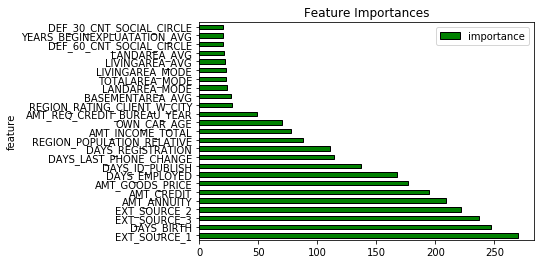

In [454]:
def show_feature_importances(model, features):
    results = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results = results.sort_values('importance', ascending = False)
    print(results.head(10))
    results.head(25).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'green', edgecolor = 'k', title = 'Feature Importances');
    return results

feature_importances = show_feature_importances(lgbt_6, X_train.columns)

In [445]:
cat_6=CatBoostClassifier(loss_function='Logloss',n_estimators=450,learning_rate=0.09,max_depth=8)

In [467]:
%%time
cat_6.fit(X_train,y_train)

0:	learn: 0.5992188	total: 603ms	remaining: 4m 30s
1:	learn: 0.5252864	total: 1.22s	remaining: 4m 32s
2:	learn: 0.4728678	total: 1.79s	remaining: 4m 26s
3:	learn: 0.4293826	total: 2.31s	remaining: 4m 17s
4:	learn: 0.3941347	total: 2.85s	remaining: 4m 13s
5:	learn: 0.3664071	total: 3.37s	remaining: 4m 9s
6:	learn: 0.3447766	total: 4.01s	remaining: 4m 14s
7:	learn: 0.3287603	total: 4.58s	remaining: 4m 13s
8:	learn: 0.3157859	total: 5.17s	remaining: 4m 13s
9:	learn: 0.3053510	total: 5.75s	remaining: 4m 13s
10:	learn: 0.2977990	total: 6.32s	remaining: 4m 12s
11:	learn: 0.2899883	total: 7.09s	remaining: 4m 18s
12:	learn: 0.2838200	total: 7.61s	remaining: 4m 15s
13:	learn: 0.2787180	total: 8.08s	remaining: 4m 11s
14:	learn: 0.2750168	total: 8.53s	remaining: 4m 7s
15:	learn: 0.2719117	total: 9.08s	remaining: 4m 6s
16:	learn: 0.2695005	total: 9.65s	remaining: 4m 5s
17:	learn: 0.2673512	total: 10.1s	remaining: 4m 3s
18:	learn: 0.2650509	total: 10.7s	remaining: 4m 2s
19:	learn: 0.2633968	total: 

158:	learn: 0.2388856	total: 1m 28s	remaining: 2m 41s
159:	learn: 0.2387651	total: 1m 29s	remaining: 2m 41s
160:	learn: 0.2386626	total: 1m 29s	remaining: 2m 40s
161:	learn: 0.2385645	total: 1m 30s	remaining: 2m 40s
162:	learn: 0.2384914	total: 1m 30s	remaining: 2m 39s
163:	learn: 0.2384119	total: 1m 31s	remaining: 2m 38s
164:	learn: 0.2383638	total: 1m 31s	remaining: 2m 38s
165:	learn: 0.2383137	total: 1m 31s	remaining: 2m 37s
166:	learn: 0.2382395	total: 1m 32s	remaining: 2m 36s
167:	learn: 0.2381748	total: 1m 32s	remaining: 2m 36s
168:	learn: 0.2381021	total: 1m 33s	remaining: 2m 35s
169:	learn: 0.2379954	total: 1m 34s	remaining: 2m 34s
170:	learn: 0.2379201	total: 1m 34s	remaining: 2m 34s
171:	learn: 0.2378143	total: 1m 35s	remaining: 2m 33s
172:	learn: 0.2377635	total: 1m 35s	remaining: 2m 32s
173:	learn: 0.2376759	total: 1m 36s	remaining: 2m 32s
174:	learn: 0.2376423	total: 1m 36s	remaining: 2m 31s
175:	learn: 0.2375673	total: 1m 36s	remaining: 2m 30s
176:	learn: 0.2374673	total:

311:	learn: 0.2277676	total: 3m 1s	remaining: 1m 20s
312:	learn: 0.2277014	total: 3m 2s	remaining: 1m 19s
313:	learn: 0.2276321	total: 3m 2s	remaining: 1m 19s
314:	learn: 0.2275570	total: 3m 3s	remaining: 1m 18s
315:	learn: 0.2274656	total: 3m 4s	remaining: 1m 18s
316:	learn: 0.2273911	total: 3m 5s	remaining: 1m 17s
317:	learn: 0.2272886	total: 3m 5s	remaining: 1m 17s
318:	learn: 0.2272403	total: 3m 6s	remaining: 1m 16s
319:	learn: 0.2271689	total: 3m 7s	remaining: 1m 16s
320:	learn: 0.2271219	total: 3m 8s	remaining: 1m 15s
321:	learn: 0.2270378	total: 3m 8s	remaining: 1m 15s
322:	learn: 0.2269398	total: 3m 9s	remaining: 1m 14s
323:	learn: 0.2268700	total: 3m 10s	remaining: 1m 14s
324:	learn: 0.2267986	total: 3m 11s	remaining: 1m 13s
325:	learn: 0.2267203	total: 3m 11s	remaining: 1m 12s
326:	learn: 0.2266725	total: 3m 12s	remaining: 1m 12s
327:	learn: 0.2266240	total: 3m 13s	remaining: 1m 11s
328:	learn: 0.2265565	total: 3m 13s	remaining: 1m 11s
329:	learn: 0.2265143	total: 3m 14s	rema

In [468]:
average_precision_score(y_test,cat_6.predict_proba(X_test)[:,1])

0.22850984534294794

              feature  importance
22       EXT_SOURCE_3   12.804274
21       EXT_SOURCE_2   11.300437
20       EXT_SOURCE_1    7.838790
6          DAYS_BIRTH    6.003837
4     AMT_GOODS_PRICE    4.942050
7       DAYS_EMPLOYED    4.822480
3         AMT_ANNUITY    4.374500
2          AMT_CREDIT    4.132433
8   DAYS_REGISTRATION    3.762260
9     DAYS_ID_PUBLISH    3.719054


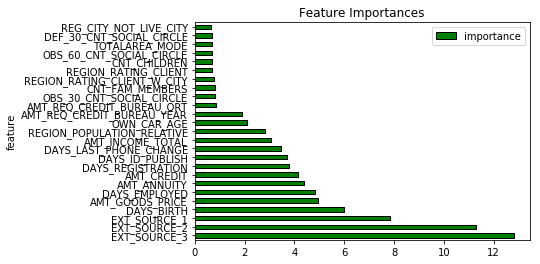

In [469]:
feature_importances = show_feature_importances(cat_6, X_train.columns)

In [509]:
df_for_cat=df_drop_cat[X_train.columns[list(cat_6.feature_importances_>3)]]
df_for_lgbt=df_drop_cat[X_train.columns[list(lgbt_6.feature_importances_>340)]]

In [512]:
X_cat_cat=df_for_cat
y_cat_cat=df_drop_cat['TARGET']
X_train_cat_cat, X_test_cat_cat, y_train_cat_cat, y_test_cat_cat = train_test_split(X_cat_cat, y_cat_cat,test_size=0.3, random_state=0)

In [513]:
X_lgbt_lgbt=df_for_lgbt
y_lgbt_lgbt=df_drop_cat['TARGET']
X_train_lgbt_lgbt, X_test_lgbt_lgbt, y_train_lgbt_lgbt, y_test_lgbt_lgbt = train_test_split(X, y,test_size=0.3, random_state=0)

переобучим заново

In [515]:
lgbt_6_new=lgbm.LGBMClassifier(max_depth=-1, n_estimators=100,learning_rate=0.09,objective='binary')

In [516]:
%%time
lgbt_6_new.fit(X_train_lgbt_lgbt,y_train_lgbt_lgbt)

Wall time: 4.98 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.09, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [518]:
average_precision_score(y_test_lgbt_lgbt,lgbt_6_new.predict_proba(X_test_lgbt_lgbt)[:,1])

0.2249814783515435

In [519]:
cat_6_new=CatBoostClassifier(loss_function='Logloss',n_estimators=450,learning_rate=0.09,max_depth=8)

In [521]:
%%time
cat_6_new.fit(X_train_cat_cat,y_train_cat_cat)

0:	learn: 0.5985937	total: 383ms	remaining: 2m 51s
1:	learn: 0.5257724	total: 744ms	remaining: 2m 46s
2:	learn: 0.4687261	total: 1.13s	remaining: 2m 48s
3:	learn: 0.4240763	total: 1.46s	remaining: 2m 42s
4:	learn: 0.3900234	total: 1.8s	remaining: 2m 40s
5:	learn: 0.3635481	total: 2.2s	remaining: 2m 42s
6:	learn: 0.3425821	total: 2.55s	remaining: 2m 41s
7:	learn: 0.3258537	total: 2.92s	remaining: 2m 41s
8:	learn: 0.3121135	total: 3.31s	remaining: 2m 41s
9:	learn: 0.3014285	total: 3.66s	remaining: 2m 40s
10:	learn: 0.2929641	total: 4s	remaining: 2m 39s
11:	learn: 0.2862532	total: 4.34s	remaining: 2m 38s
12:	learn: 0.2807262	total: 4.71s	remaining: 2m 38s
13:	learn: 0.2763991	total: 5.1s	remaining: 2m 38s
14:	learn: 0.2728936	total: 5.54s	remaining: 2m 40s
15:	learn: 0.2698467	total: 6.07s	remaining: 2m 44s
16:	learn: 0.2671190	total: 6.47s	remaining: 2m 44s
17:	learn: 0.2649810	total: 6.8s	remaining: 2m 43s
18:	learn: 0.2632183	total: 7.15s	remaining: 2m 42s
19:	learn: 0.2616111	total: 7

158:	learn: 0.2407132	total: 59.8s	remaining: 1m 49s
159:	learn: 0.2406617	total: 1m	remaining: 1m 49s
160:	learn: 0.2405848	total: 1m	remaining: 1m 48s
161:	learn: 0.2405393	total: 1m	remaining: 1m 48s
162:	learn: 0.2404476	total: 1m 1s	remaining: 1m 48s
163:	learn: 0.2403568	total: 1m 1s	remaining: 1m 47s
164:	learn: 0.2403177	total: 1m 2s	remaining: 1m 47s
165:	learn: 0.2402390	total: 1m 2s	remaining: 1m 47s
166:	learn: 0.2401810	total: 1m 2s	remaining: 1m 46s
167:	learn: 0.2401220	total: 1m 3s	remaining: 1m 46s
168:	learn: 0.2400610	total: 1m 3s	remaining: 1m 45s
169:	learn: 0.2399961	total: 1m 3s	remaining: 1m 45s
170:	learn: 0.2399054	total: 1m 4s	remaining: 1m 44s
171:	learn: 0.2398152	total: 1m 4s	remaining: 1m 44s
172:	learn: 0.2397533	total: 1m 4s	remaining: 1m 44s
173:	learn: 0.2396762	total: 1m 5s	remaining: 1m 43s
174:	learn: 0.2395839	total: 1m 5s	remaining: 1m 43s
175:	learn: 0.2395287	total: 1m 6s	remaining: 1m 42s
176:	learn: 0.2394505	total: 1m 6s	remaining: 1m 42s
17

312:	learn: 0.2314811	total: 2m	remaining: 52.9s
313:	learn: 0.2314332	total: 2m 1s	remaining: 52.5s
314:	learn: 0.2313677	total: 2m 1s	remaining: 52.2s
315:	learn: 0.2313197	total: 2m 2s	remaining: 51.8s
316:	learn: 0.2312335	total: 2m 2s	remaining: 51.4s
317:	learn: 0.2311848	total: 2m 2s	remaining: 51s
318:	learn: 0.2311161	total: 2m 3s	remaining: 50.6s
319:	learn: 0.2310710	total: 2m 3s	remaining: 50.2s
320:	learn: 0.2310069	total: 2m 4s	remaining: 49.9s
321:	learn: 0.2309294	total: 2m 4s	remaining: 49.5s
322:	learn: 0.2308863	total: 2m 4s	remaining: 49.1s
323:	learn: 0.2308405	total: 2m 5s	remaining: 48.7s
324:	learn: 0.2307805	total: 2m 5s	remaining: 48.3s
325:	learn: 0.2307313	total: 2m 5s	remaining: 47.9s
326:	learn: 0.2306831	total: 2m 6s	remaining: 47.5s
327:	learn: 0.2306075	total: 2m 6s	remaining: 47.1s
328:	learn: 0.2305510	total: 2m 6s	remaining: 46.7s
329:	learn: 0.2305065	total: 2m 7s	remaining: 46.3s
330:	learn: 0.2304532	total: 2m 7s	remaining: 45.9s
331:	learn: 0.230

In [522]:
average_precision_score(y_test_cat_cat,cat_6_new.predict_proba(X_test_cat_cat)[:,1])

0.22285320250114576

качество упало относительно несильно)

__Задание 7. (0.001 балла)__

Приложите ссылку на любимое короткое видео на YouTube, чтобы поднять проверяющему настроение.

##### Хотя  не уверен, что стоит

https://www.youtube.com/watch?v=pbxABKSZ2P0